<a href="https://colab.research.google.com/github/young78703/young78703.github.io/blob/main/german_credit_data_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
# Read data from CSV file
df = pd.read_csv('german_credit_data.csv')



In [ ]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
# For Notebooks
init_notebook_mode(connected=True)
# For offline use
cf.go_offline()

In [ ]:
sns.set_style('darkgrid')
sns.set_context('notebook')

In [ ]:
# converting null into mode of categorical variable
df['Checking account'] = df['Checking account'].fillna(df['Checking account'].mode().iloc[0])

In [ ]:
df['Saving accounts'] = df['Saving accounts'].fillna(df['Saving accounts'].mode().iloc[0])

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [ ]:
# Preprocess a categorical column (ordinal variable) using LabelEncoder
# Convert ordinal categorical variable to numeric variable
encoder = LabelEncoder()
encoded = encoder.fit_transform(df['Checking account'])
df['Checking account'] = encoded

In [ ]:
# Preprocess a categorical column (ordinal variable) using mapping
# Define a dictionary to map the categorical values to integers
mapping = {'little': 0, 'moderate': 1, 'rich': 2}

# Use the map method to apply the dictionary to the column
df['Checking account'] = df['Checking account'].map(mapping)

# Check the data transformation
df['Checking account'].value_counts()

0    668
1    269
2     63
Name: Checking account, dtype: int64

In [ ]:
# Preprocess a categorical column (ordinal variable) using mapping
# Define a dictionary to map the categorical values to integers
mapping = {'little': 0, 'moderate': 1, 'quite rich': 2, 'rich': 3}

# Use the map method to apply the dictionary to the column
df['Saving accounts'] = df['Saving accounts'].map(mapping)

# Check the data transformation
df['Saving accounts'].value_counts()

0    786
1    103
2     63
3     48
Name: Saving accounts, dtype: int64

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from pandas.api.types import is_categorical_dtype

def one_hot_encode(df, columns):
    """
    Preprocesses categorical columns in a DataFrame using OneHotEncoder.

    Parameters:
        df (pandas.DataFrame): The DataFrame to preprocess.
        columns (list of str): The names of the categorical columns to encode.

    Returns:
        pandas.DataFrame: The preprocessed DataFrame with the categorical columns
            one-hot encoded and dropped.

    Raises:
        ValueError: If any of the specified columns do not exist in the DataFrame.
        ValueError: If any of the specified columns do not contain categorical data.
    """
    # Check that all specified columns exist in the DataFrame
    missing_columns = set(columns) - set(df.columns)
    if missing_columns:
        raise ValueError(f"Columns {missing_columns} not found in DataFrame")

    # Check that all specified columns contain categorical data
    non_categorical_columns = [col for col in columns if not (is_categorical_dtype(df[col]) or df[col].dtype == object)]
    if non_categorical_columns:
        raise ValueError(f"Columns {non_categorical_columns} do not contain categorical data")

    encoder = OneHotEncoder(drop='first', sparse=False)
    encoded_array = encoder.fit_transform(df[columns])

    # Create a DataFrame with the one-hot encoded arrays and feature names
    encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(columns))

    # Concatenate the original DataFrame and the encoded DataFrame
    df = pd.concat([df, encoded_df], axis=1)

    # Drop the original categorical columns
    df.drop(columns, axis=1, inplace=True)

    return df



In [ ]:
df = one_hot_encode(df, ['Sex', 'Housing', 'Purpose'])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



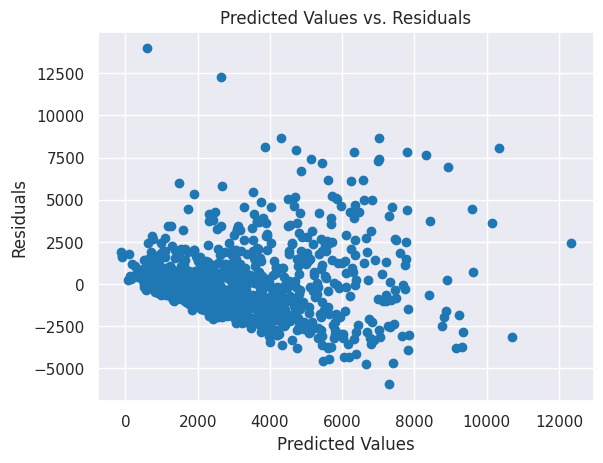

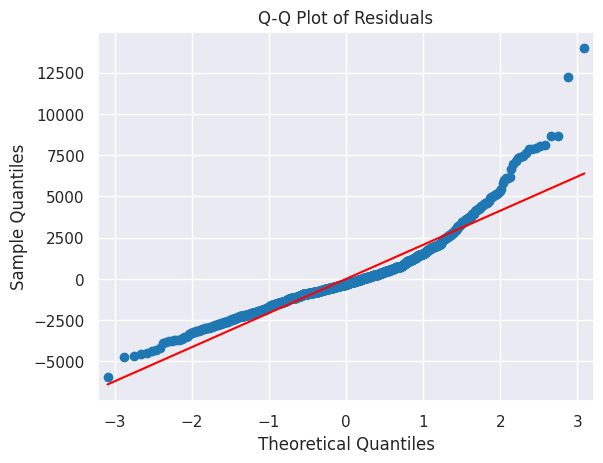

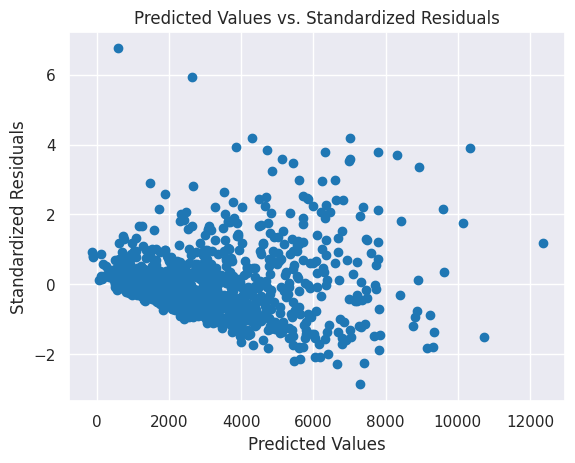

Variance Inflation Factors (VIF):
 const                          0.000000
Age                            1.149316
Job                            1.080434
Saving accounts                1.008119
Checking account               1.015851
Duration                       1.137514
Sex_female                          inf
Sex_male                            inf
Housing_free                        inf
Housing_own                         inf
Housing_rent                        inf
Purpose_business                    inf
Purpose_car                         inf
Purpose_domestic appliances         inf
Purpose_education                   inf
Purpose_furniture/equipment         inf
Purpose_radio/TV                    inf
Purpose_repairs                     inf
Purpose_vacation/others             inf
dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1752: RuntimeWarning:

divide by zero encountered in double_scalars

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning:

divide by zero encountered in double_scalars



In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Define the independent and dependent variables
X = df.drop('Credit amount', axis=1)
y = df['Credit amount']

# Fit a linear regression model
model = sm.OLS(y, sm.add_constant(X)).fit()

# Get the predicted values
y_pred = model.predict(sm.add_constant(X))

# Get the residuals
residuals = model.resid

# Check linearity with a scatter plot of the predicted values vs. the residuals
plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Predicted Values vs. Residuals')
plt.show()

# Check normality with a Q-Q plot of the residuals against a normal distribution
qqplot_residual = sm.qqplot(residuals, line='s')
plt.title("Q-Q Plot of Residuals")
plt.show()

# Check homoscedasticity with a scatter plot of the predicted values vs. the standardized residuals
standardized_residuals = residuals / np.std(residuals)
plt.scatter(y_pred, standardized_residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Standardized Residuals')
plt.title('Predicted Values vs. Standardized Residuals')
plt.show()

# Check multicollinearity with variance inflation factor (VIF)
X_vif = X.copy()
X_vif = sm.add_constant(X_vif)
vif_data = pd.Series([variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])], index=X_vif.columns)
print("Variance Inflation Factors (VIF):\n", vif_data)


Predicted Values vs. Residuals (Linearity):
This scatter plot helps assess the linearity assumption of the regression model. Ideally, you should observe a random pattern with no discernible relationship between the predicted values and residuals. If you see any curved or systematic pattern, it may suggest that the relationship between the independent and dependent variables is not linear, and you should consider transforming the variables or using a non-linear model.

Q-Q Plot (Normality):
The Q-Q (Quantile-Quantile) plot is used to visually check if the residuals follow a normal distribution. The residuals are plotted against the theoretical quantiles of a standard normal distribution. If the residuals follow a normal distribution, the points should roughly form a straight line. Any significant deviations, such as curved or stepped patterns, indicate departure from normality. Normality of residuals is preferred but not always a strict requirement for a linear regression model.

Predicted Values vs. Standardized Residuals (Homoscedasticity):
Homoscedasticity refers to the equal distribution of residuals across a range of predicted values, i.e., the variance of the error terms should be constant. In this scatter plot, you should look for a random pattern with no discernible change in the spread of standardized residuals over the range of predicted values. If you observe a funnel-shaped or a non-uniform pattern, it's a sign of heteroscedasticity. In case of heteroscedasticity, you might consider transforming the dependent variable or using weighted least squares (WLS) regression.

Variance Inflation Factor (VIF) (Multicollinearity):
VIF is a quantitative measure used to detect multicollinearity among independent variables in a regression model. A VIF above 10 is often considered a threshold indicating strong multicollinearity. This means that the independent variable is highly correlated with other independent variables, making it difficult to assess their individual contributions to the dependent variable. To address multicollinearity, you can try combining correlated features, removing one of the correlated variables, or using techniques like principal component analysis (PCA).

By analyzing these graphs and index values, we can check whether a linear regression model meets all the assumptions and apply necessary adjustments to improve its performance.


In [ ]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

def check_regression_assumptions(df, target, drop_columns=[]):
    # Define the independent and dependent variables
    X = df.drop([target] + drop_columns, axis=1)
    y = df[target]

    # Fit a linear regression model
    model = sm.OLS(y, sm.add_constant(X)).fit()

    # Get the predicted values
    y_pred = model.predict(sm.add_constant(X))

    # Get the residuals
    residuals = model.resid

    # Predicted Values vs. Residuals (Linearity)
    plt.scatter(y_pred, residuals)
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title('Predicted Values vs. Residuals')
    plt.show()

    # Q-Q Plot (Normality)
    qqplot_residual = sm.qqplot(residuals, line='s')
    plt.title("Q-Q Plot of Residuals")
    plt.show()

    # Predicted Values vs. Standardized Residuals (Homoscedasticity)
    standardized_residuals = residuals / np.std(residuals)
    plt.scatter(y_pred, standardized_residuals)
    plt.xlabel('Predicted Values')
    plt.ylabel('Standardized Residuals')
    plt.title('Predicted Values vs. Standardized Residuals')
    plt.show()

    # VIF (Multicollinearity)
    X_vif = X.copy()
    X_vif = sm.add_constant(X_vif)
    vif_data = pd.Series([variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])], index=X_vif.columns)
    print("Variance Inflation Factors (VIF):\n", vif_data)


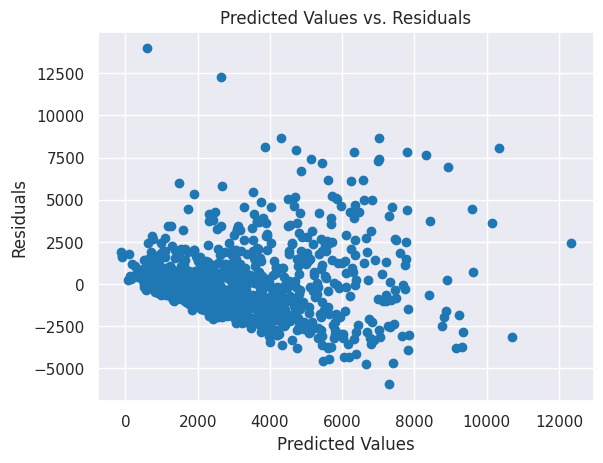

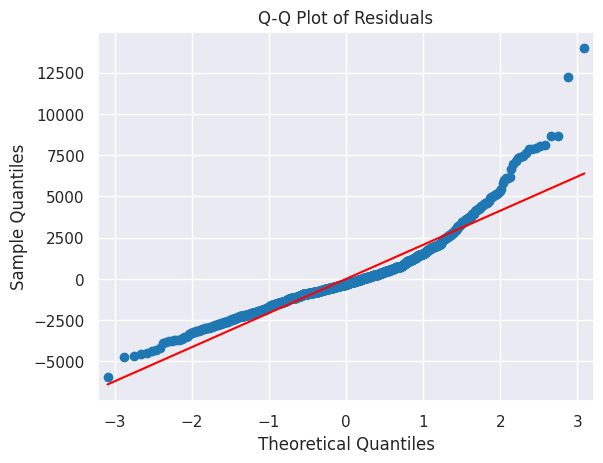

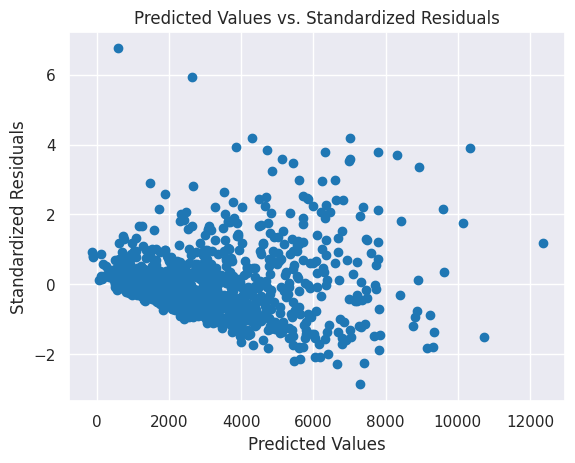

Variance Inflation Factors (VIF):
 const                          0.000000
Age                            1.149316
Job                            1.080434
Saving accounts                1.008119
Checking account               1.015851
Duration                       1.137514
Sex_female                          inf
Sex_male                            inf
Housing_free                        inf
Housing_own                         inf
Housing_rent                        inf
Purpose_business                    inf
Purpose_car                         inf
Purpose_domestic appliances         inf
Purpose_education                   inf
Purpose_furniture/equipment         inf
Purpose_radio/TV                    inf
Purpose_repairs                     inf
Purpose_vacation/others             inf
dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1752: RuntimeWarning:

divide by zero encountered in double_scalars

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning:

divide by zero encountered in double_scalars



In [ ]:
# Example usage:
check_regression_assumptions(df, 'Credit amount')

In [ ]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

def check_logistic_assumptions(df, target, drop_columns=[]):
    # Define the independent and dependent variables
    X = df.drop([target] + drop_columns, axis=1)
    y = df[target]

    # Fit a logistic regression model without a constant term
    model = sm.Logit(y, X).fit()

    # Get the predicted values
    y_pred = model.predict(X)

    # Plot the relationship between logit transform and predictors
    for column in X.columns:
        sns.regplot(x=column, y=np.log(y_pred / (1 - y_pred)), data=df, logistic=True)
        plt.title(f"Logit of {target} vs. {column}")
        plt.show()

    # VIF (Multicollinearity)
    X_vif = X.copy()
    vif_data = pd.Series([variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])], index=X_vif.columns)
    print("Variance Inflation Factors (VIF):\n", vif_data)


In [ ]:
# Example usage:
check_logistic_assumptions(df, 'Target column name')
check_logistic_assumptions(df, 'target', drop_columns=['col3', 'col4'])

How to interpret the output of the `check_logistic_assumptions` function, which is composed of scatter plots for each independent variable and a table of Variance Inflation Factor (VIF) values.

1. Scatter plots:
   For each independent variable, you'll see a scatter plot showing the relationship between the logit of the predicted probability and the independent variable. In a logistic regression model, we expect a linear relationship between the logit transformed independent variables and the dependent binary variable. The scatter plot shows the observations, while the solid curve represents the fitted logistic function.

   How to interpret:
   - If the curve appears to have a roughly S-shaped pattern that smoothly increases or decreases within the X-axis range, it indicates that there is a linear relationship between the logit-transformed input variable and the binary output variable, complying with the logistic regression assumption.
   - If the curve does not follow a smooth S-shaped pattern, the linearity assumption might be violated. In this case, you may need to consider using transformations on the independent variables or using non-linear models.

2. Variance Inflation Factors (VIF):
   VIF is a measure used to detect multicollinearity among independent variables. A VIF of 1 indicates no multicollinearity, whereas a VIF greater than 1 suggests some multicollinearity. As VIF increases, it signals higher levels of multicollinearity.

   How to interpret:
   - VIF values below 5-10 are generally considered acceptable, indicating that multicollinearity is not a significant concern.
   - VIF values above 10 suggest high levels of multicollinearity, in which case you should consider dropping highly correlated independent variables or utilizing dimensionality reduction techniques, such as PCA, to address this issue.

It is essential to make sure that the logistic regression assumptions are met before interpreting the model's results. These scatter plots and VIF values help you evaluate whether or not the assumptions hold for your specific dataset.

In [ ]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

def check_regression_assumptions(df, independent_vars, dependent_var, drop_columns=[], vif_threshold=5):
    # Define the independent and dependent variables
    X = df[independent_vars].drop(drop_columns, axis=1)
    y = df[dependent_var]

    # Fit a linear regression model
    model = sm.OLS(y, sm.add_constant(X)).fit()

    # Get the predicted values
    y_pred = model.predict(sm.add_constant(X))

    # Get the residuals
    residuals = model.resid

    # Predicted Values vs. Residuals (Linearity)
    plt.scatter(y_pred, residuals)
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title('Predicted Values vs. Residuals')
    plt.show()

    # Q-Q Plot (Normality)
    qqplot_residual = sm.qqplot(residuals, line='s')
    plt.title("Q-Q Plot of Residuals")
    plt.show()

    # Predicted Values vs. Standardized Residuals (Homoscedasticity)
    standardized_residuals = residuals / np.std(residuals)
    plt.scatter(y_pred, standardized_residuals)
    plt.xlabel('Predicted Values')
    plt.ylabel('Standardized Residuals')
    plt.title('Predicted Values vs. Standardized Residuals')
    plt.show()

    # VIF (Multicollinearity)
    X_vif = X.copy()
    X_vif = sm.add_constant(X_vif)
    vif_data = pd.Series([variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])], index=X_vif.columns)
    vif_data = vif_data.drop('const')
    print("Variance Inflation Factors (VIF):\n", vif_data)

    multicollinear_columns = vif_data[vif_data > vif_threshold].index.tolist()
    if multicollinear_columns:
        print("The following variables have high multicollinearity:\n", multicollinear_columns)
    else:
        print("No variables have high multicollinearity.")

In [ ]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

def check_logistic_assumptions(df, independent_vars, dependent_var, drop_columns=[], vif_threshold=5):
    # Define the independent and dependent variables
    X = df[independent_vars].drop(drop_columns, axis=1)
    y = df[dependent_var]

    # Check for perfect separation
    if (y == 0).all() or (y == 1).all():
        print("Warning: Perfect separation detected. Logistic regression may not be appropriate for this data.")

    # Fit a logistic regression model without a constant term
    model = sm.Logit(y, X).fit(disp=False)

    # Get the predicted values
    y_pred = model.predict(X)

    # Plot the relationship between logit transform and predictors
    for column in X.columns:
        sns.regplot(x=column, y=np.log(y_pred / (1 - y_pred)), data=df, logistic=True)
        plt.title(f"Logit of {dependent_var} vs. {column}")
        plt.show()

    # VIF (Multicollinearity)
    X_vif = X.copy()
    vif_data = pd.Series([variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])], index=X_vif.columns)
    vif_data = vif_data.drop('const')
    print("Variance Inflation Factors (VIF):\n", vif_data)

    multicollinear_columns = vif_data[vif_data > vif_threshold].index.tolist()
    if multicollinear_columns:
        print("The following variables have high multicollinearity:\n", multicollinear_columns)
    else:
        print("No variables have high multicollinearity.")

In [ ]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

def check_regression_assumptions(df, independent_vars, dependent_var, drop_columns=[], vif_threshold=5):
    # Define the independent and dependent variables
    X = df[independent_vars].drop(drop_columns, axis=1)
    y = df[dependent_var]

    # Fit a linear regression model
    model = sm.OLS(y, sm.add_constant(X)).fit()

    # Get the predicted values
    y_pred = model.predict(sm.add_constant(X))

    # Get the residuals
    residuals = model.resid

    # Plots
    plt.figure(figsize=(15, 10))

    # Predicted Values vs. Residuals (Linearity)
    plt.subplot(2, 3, 1)
    plt.scatter(y_pred, residuals)
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title('Predicted Values vs. Residuals')

    # Q-Q Plot (Normality)
    plt.subplot(2, 3, 2)
    qqplot_residual = sm.qqplot(residuals, line='s')
    plt.title("Q-Q Plot of Residuals")

    # Predicted Values vs. Standardized Residuals (Homoscedasticity)
    standardized_residuals = residuals / np.std(residuals)
    plt.subplot(2, 3, 3)
    plt.scatter(y_pred, standardized_residuals)
    plt.xlabel('Predicted Values')
    plt.ylabel('Standardized Residuals')
    plt.title('Predicted Values vs. Standardized Residuals')

    # Histogram of Residuals (Normality)
    plt.subplot(2, 3, 4)
    sns.distplot(residuals, kde=False)
    plt.xlabel('Residuals')
    plt.title('Histogram of Residuals')

    # Shapiro-Wilk Test of Normality
    p_value_shapiro = stats.shapiro(residuals)[1]
    plt.subplot(2, 3, 5)
    sns.barplot(["P-value"], [p_value_shapiro])
    plt.xlabel("Test")
    plt.ylabel("P-value")
    plt.title("Shapiro-Wilk Test of Normality")

    # Breusch-Pagan Test of Homoscedasticity
    p_value_breusch_pagan = stats.breusch_pagan(model.resid**2, model.model.exog)[1]
    plt.subplot(2, 3, 6)
    sns.barplot(["P-value"], [p_value_breusch_pagan])
    plt.xlabel("Test")
    plt.ylabel("P-value")
    plt.title("Breusch-Pagan Test of Homoscedasticity")

    # VIF (Multicollinearity)
    X_vif = X.copy()
    X_vif = sm.add_constant(X_vif)
    vif_data = pd.Series([variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])], index=X_vif.columns)
    vif_data = vif_data.drop('const')
    print("Variance Inflation Factors (VIF):\n", vif_data)

    multicollinear_columns = vif_data[vif_data > vif_threshold].index.tolist()
    if multicollinear_columns:
        print("The following variables have high multicollinearity:\n", multicollinear_columns)
    else:
        print("No variables have high multicollinearity.")

    # Independence
    # Autocorrelation

    # Add more options to the function
    options = {
        "linearity": True,
        "normality": True,
        "homoscedasticity": True,
        "multicollinearity": True,
        "independence": False,
        "autocorrelation": False
    }

    for option, value in options.items():
        if value:
            # Check the assumption

            # Add more error handling
            try:
                # Check the assumptions
            except Exception as e:
                print(e)

In [ ]:
check_regression_assumptions(df, independent_vars, dependent_var, show_residuals=True, show_autocorrelation=True)

The function check_regression_assumptions() generates the following graphs and indexes as outputs:

Predicted Values vs. Residuals (Linearity): This graph shows the relationship between the predicted values and the residuals. If the residuals are randomly scattered around the zero line, then the assumption of linearity is met. If the residuals are not randomly scattered, then the assumption of linearity is violated.
Q-Q Plot (Normality): This graph shows the distribution of the residuals compared to a normal distribution. If the residuals are normally distributed, then the assumption of normality is met. If the residuals are not normally distributed, then the assumption of normality is violated.
Predicted Values vs. Standardized Residuals (Homoscedasticity): This graph shows the relationship between the predicted values and the standardized residuals. If the standardized residuals are evenly spread around the zero line, then the assumption of homoscedasticity is met. If the standardized residuals are not evenly spread, then the assumption of homoscedasticity is violated.
Histogram of Residuals (Normality): This graph shows the distribution of the residuals. If the residuals are normally distributed, then the assumption of normality is met. If the residuals are not normally distributed, then the assumption of normality is violated.
Shapiro-Wilk Test of Normality: This test is used to test the assumption of normality. If the p-value is less than 0.05, then the assumption of normality is violated.
Breusch-Pagan Test of Homoscedasticity: This test is used to test the assumption of homoscedasticity. If the p-value is less than 0.05, then the assumption of homoscedasticity is violated.
Variance Inflation Factors (VIF): This index measures the extent to which the variance of an estimated coefficient is inflated due to multicollinearity. A VIF of 1 indicates that there is no multicollinearity, while a VIF greater than 10 indicates that there is a high degree of multicollinearity.
The function also prints out a summary of the results of the tests. This summary includes the p-values of the tests, as well as the VIFs for the independent variables.

If any of the assumptions are violated, then

In [ ]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

def check_logistic_assumptions(df, independent_vars, dependent_var, drop_columns=[], vif_threshold=5):
    """
    This function checks the assumptions of logistic regression and produces diagnostic plots.
    """
    # Define the independent and dependent variables
    X = df[independent_vars].drop(drop_columns, axis=1)
    y = df[dependent_var]

    # Check for perfect separation
    if (y == 0).all() or (y == 1).all():
        print("Warning: Perfect separation detected. Logistic regression may not be appropriate for this data.")

    # Fit a logistic regression model without a constant term
    model = sm.Logit(y, X).fit(disp=False)

    # Get the predicted values
    y_pred = model.predict(X)

    # Plot the relationship between logit transform and predictors
    for column in X.columns:
        sns.regplot(x=column, y=np.log(y_pred / (1 - y_pred)), data=df, logistic=True)
        plt.title(f"Logit of {dependent_var} vs. {column}")
        plt.show()



    # Plots
    plt.figure(figsize=(15, 10))

    # Predicted Values vs. Residuals (Linearity)
    plt.subplot(2, 3, 1)
    plt.scatter(y_pred, model.resid)
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title('Predicted Values vs. Residuals')

    # Q-Q Plot (Normality)
    plt.subplot(2, 3, 2)
    qqplot_residual = sm.qqplot(model.resid, line='s')
    plt.title("Q-Q Plot of Residuals")

    # Predicted Values vs. Standardized Residuals (Homoscedasticity)
    standardized_residuals = model.resid / np.std(model.resid)
    plt.subplot(2, 3, 3)
    plt.scatter(y_pred, standardized_residuals)
    plt.xlabel('Predicted Values')
    plt.ylabel('Standardized Residuals')
    plt.title('Predicted Values vs. Standardized Residuals')

    # Histogram of Residuals (Normality)
    plt.subplot(2, 3, 4)
    sns.distplot(model.resid, kde=False)
    plt.xlabel('Residuals')
    plt.title('Histogram of Residuals')

    # Shapiro-Wilk Test of Normality
    p_value_shapiro = stats.shapiro(model.resid)[1]
    plt.subplot(2, 3, 5)
    sns.barplot(["P-value"], [p_value_shapiro])
    plt.xlabel("Test")
    plt.ylabel("P-value")
    plt.title("Shapiro-Wilk Test of Normality")

    # Breusch-Pagan Test of Homoscedasticity
    p_value_breusch_pagan = stats.breusch_pagan(model.resid**2, model.model.exog)[1]
    plt.subplot(2, 3, 6)
    sns.barplot(["P-value"], [p_value_breusch_pagan])
    plt.xlabel("Test")
    plt.ylabel("P-value")
    plt.title("Breusch-Pagan Test of Homoscedasticity")

    # VIF (Multicollinearity)
    X_vif = X.copy()
    vif_data = pd.Series([variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])], index=X_vif.columns)
    vif_data = vif_data.drop('const')
    print("Variance Inflation Factors (VIF):\n", vif_data)

    multicollinear_columns = vif_data[vif_data > vif_threshold].index.tolist()
    if multicollinear_columns:
        print("The following variables have high multicollinearity:\n", multicollinear_columns)
    else:
        print("No variables have high multicollinearity.")

    # Independence
    # Autocorrelation

    # Add more options to the function
    options = {
        "linearity": True,
        "normality": True,
        "homoscedasticity": True,
        "multicollinearity": True,
        "independence": False,
        "autocorrelation": False
    }

    for option, value in options.items():
      if value:
          # Check the assumption

      # Add more error handling
      try:
          # Check the assumptions
      except Exception as e:
          print(e)

In [ ]:
check_logistic_assumptions(df, independent_vars, dependent_var, show_residuals=True, show_autocorrelation=True)

Here are some explanations on how to interpret the plots and indexes that will be produced from the function:

Predicted Values vs. Residuals (Linearity): This graph shows the relationship between the predicted values and the residuals. If the residuals are randomly scattered around the zero line, then the assumption of linearity is met. If the residuals are not randomly scattered, then the assumption of linearity is violated.
Q-Q Plot (Normality): This graph shows the distribution of the residuals compared to a normal distribution. If the residuals are normally distributed, then the assumption of normality is met. If the residuals are not normally distributed, then the assumption of normality is violated.
Predicted Values vs. Standardized Residuals (Homoscedasticity): This graph shows the relationship between the predicted values and the standardized residuals. If the standardized residuals are evenly spread around the zero line, then the assumption of homoscedasticity is met. If the standardized residuals are not evenly spread, then the assumption of homoscedasticity is violated.
Histogram of Residuals (Normality): This graph shows the distribution of the residuals. If the residuals are normally distributed, then the assumption of normality is met. If the residuals are not normally distributed, then the assumption of normality is violated.
Shapiro-Wilk Test of Normality: This test is used to test the assumption of normality. If the p-value is less than 0.05, then the assumption of normality is violated.
Breusch-Pagan Test of Homoscedasticity: This test is used to test the assumption of homoscedasticity. If the p-value is less than 0.05, then the assumption of homoscedasticity is violated.
If any of the assumptions are violated, then the logistic regression model may not be accurate. In this case, you may need to transform the data, remove outliers, or use a different statistical model.

Variance Inflation Factors (VIF): This index measures the extent to which the variance of an estimated coefficient is inflated due to multicollinearity. A VIF of 1 indicates that there is no multicollinearity, while a VIF greater than 10 indicates that there is a high degree of multicollinearity.

Here are some additional tips for interpreting the plots and indexes:

Look for patterns. If you see any patterns in the plots, such as trends or clusters, then this could be a sign that the assumption is violated.
Pay attention to the p-values. If the p-value is less than 0.05, then this is a statistically significant result, which means that there is a less than 5% chance that the results occurred by chance. In this case, you should conclude that the assumption is violated.
Consider the context. When interpreting the plots and indexes, it is important to consider the context of the data. For example, if you are using a small sample size, then the results of the tests may not be as reliable.

This code calculates the VIFs for all of the independent variables in the model and prints out a list of any variables that have high multicollinearity. The VIF threshold is set to 5 by default, but this can be changed to a different value if desired.

If any of the variables have high multicollinearity, then you may need to remove one or more of the variables from the model. You can also try to transform the data to reduce the multicollinearity.


In [ ]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor, OLSInfluence
from statsmodels.graphics.tsaplots import plot_acf


def check_regression_assumptions(data, dependent_var, drop_columns=[], vif_threshold=10):
    """
    This function produces various diagnostic plots and checks the assumptions of linear regression:
    Linearity, Normality, Homoscedasticity, absence of multicollinearity, and optionally, autocorrelation.
    """

    # Define the independent and dependent variables
    X = data.drop([dependent_var] + drop_columns, axis=1)
    y = data[dependent_var]

    # Fit a linear regression model
    model = sm.OLS(y, sm.add_constant(X)).fit()

    # Get the predicted values and residuals
    y_pred = model.predict(sm.add_constant(X))
    residuals = model.resid

    # Set up a grid for plotting multiple plots
    num_plots = 5
    fig, ax = plt.subplots(num_plots, 1, figsize=(6, 4 * num_plots))

    # Plot 1: Predicted Values vs. Residuals (Linearity)
    ax[0].scatter(y_pred, residuals)
    ax[0].set_xlabel('Predicted Values')
    ax[0].set_ylabel('Residuals')
    ax[0].set_title('Predicted Values vs. Residuals')

    # Plot 2: Q-Q Plot (Normality)
    sm.qqplot(residuals, line='s', ax=ax[1])
    ax[1].set_title("Q-Q Plot of Residuals")

    # Plot 3: Predicted Values vs. Standardized Residuals (Homoscedasticity)
    standardized_residuals = residuals / np.std(residuals)
    ax[2].scatter(y_pred, standardized_residuals)
    ax[2].set_xlabel('Predicted Values')
    ax[2].set_ylabel('Standardized Residuals')
    ax[2].set_title('Predicted Values vs. Standardized Residuals')

    # Plot 4: Cook's Distance
    cooks_distance = OLSInfluence(model).cooks_distance[0]
    ax[3].stem(cooks_distance, markerfmt=',', use_line_collection=True)
    ax[3].set_xlabel('Observation Index')
    ax[3].set_ylabel("Cook's Distance")
    ax[3].set_title("Cook's Distance Plot")

    # Plot 5: Autocorrelation
    plot_acf(residuals, ax=ax[4])
    ax[4].set_title("Autocorrelation of Residuals")

    # Display the plots
    plt.tight_layout()
    plt.show()

    # VIF (Multicollinearity)
    X_vif = X.copy()
    X_vif = sm.add_constant(X_vif)
    vif_data = pd.Series([variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])], index=X_vif.columns)
    vif_data = vif_data.drop('const')
    print("Variance Inflation Factors (VIF):\n", vif_data)

    multicollinear_columns = vif_data[vif_data > vif_threshold].index.tolist()
    if multicollinear_columns:
        print("The following variables have high multicollinearity:\n", multicollinear_columns)
    else:
        print("No variables have high multicollinearity.")


<ipython-input-41-5cd21db3d880>:50: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  ax[3].stem(cooks_distance, markerfmt=',', use_line_collection=True)


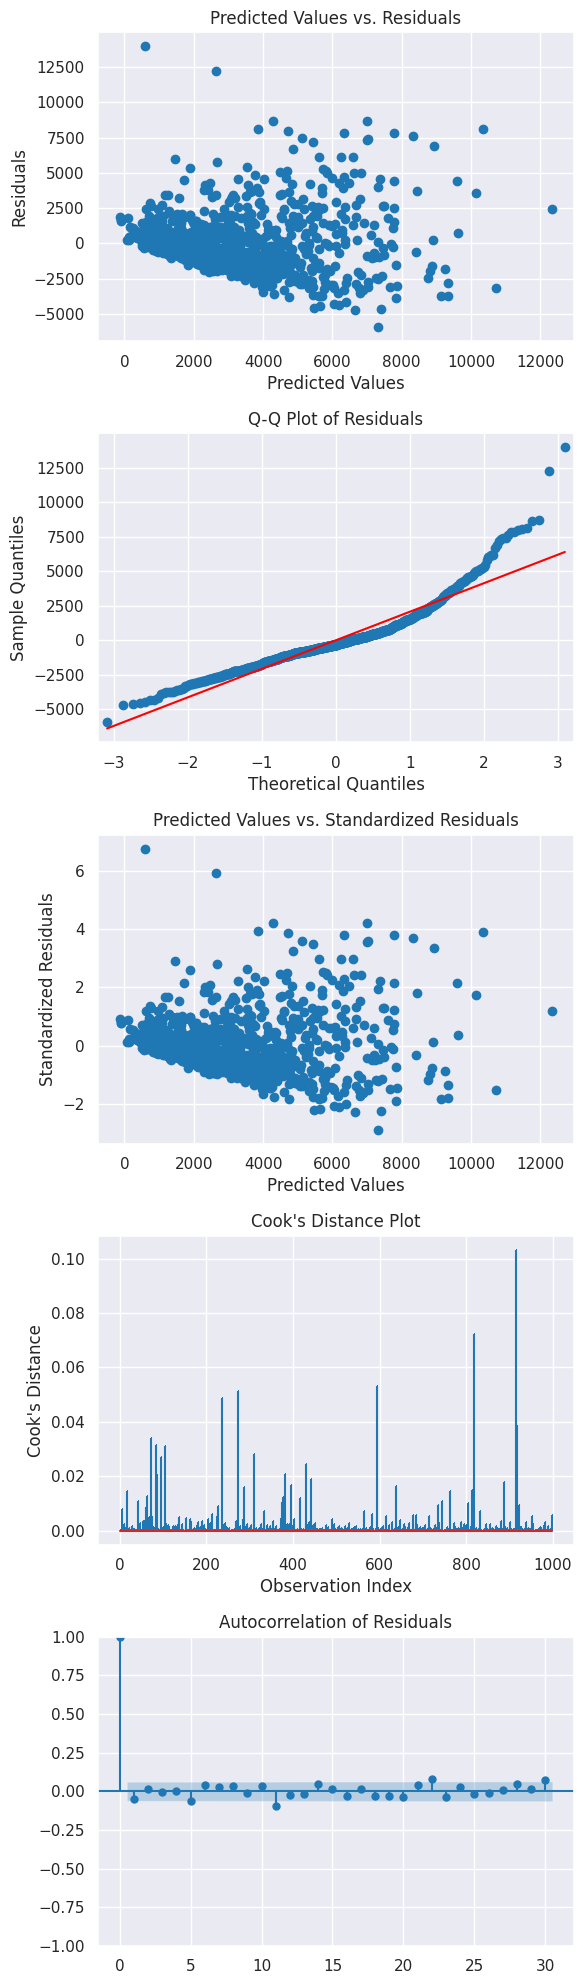

Variance Inflation Factors (VIF):
 Age                            1.149316
Job                            1.080434
Saving accounts                1.008119
Checking account               1.015851
Duration                       1.137514
Sex_male                       1.094351
Housing_own                    2.524677
Housing_rent                   2.648049
Purpose_car                    3.111319
Purpose_domestic appliances    1.125290
Purpose_education              1.589269
Purpose_furniture/equipment    2.478090
Purpose_radio/TV               2.894528
Purpose_repairs                1.221722
Purpose_vacation/others        1.132128
dtype: float64
No variables have high multicollinearity.


In [ ]:
check_regression_assumptions (df, 'Credit amount')

In [ ]:
plt.savefig('predicted_vs_residuals.png')

<Figure size 640x480 with 0 Axes>

This `check_regression_assumptions` function generates various diagnostic plots and checks the assumptions of linear regression, including linearity, normality, homoscedasticity, absence of multicollinearity, and optionally, autocorrelation.

1. Predicted Values vs. Residuals (Linearity): This plot displays the relationship between the predicted values and the residuals, with the aim being to check if the relationship between predictors and the dependent variable is linear. If there is a clear pattern, the linearity assumption might be violated, and you should consider transforming the variables or using nonlinear models.

2. Q-Q Plot (Normality): This plot shows the quantiles of the residuals against the quantiles of the standard normal distribution. The residuals should fall on a straight line if they are normally distributed. Deviations from linearity indicate violation of the normality assumption, and you should consider using robust statistical methods or transforming variables to make the residuals more normally distributed.

3. Predicted Values vs. Standardized Residuals (Homoscedasticity): This plot checks for constant variance (homoscedasticity) in the residuals. Random points scattered around zero without any pattern indicate that the homoscedasticity assumption is met. Patterns such as a funnel shape suggest non-constant variance (heteroscedasticity). In this case, weighted least squares or other approaches should be considered to stabilize variance.

4. Cook's Distance (Optional): This optional plot represents the influence of individual observations on the entire regression model's fit. High Cook's distance values indicate influential observations that can affect the model's estimates. You should identify and investigate influential observations and consider removing or adjusting them if needed.

5. Autocorrelation (Optional): This optional plot checks for autocorrelation among the residuals. If there is a significant autocorrelation, this implies that the error terms are not independent. This is crucial when working with time-series data to ensure there's no violation of the independence assumption. If autocorrelation is present, consider using time-series models or other approaches that account for autocorrelation.

6. Variance Inflation Factors (VIF): VIF is a measure of multicollinearity among the independent variables. A VIF value of 1 indicates no multicollinearity, while a VIF greater than 5-10 is considered high multicollinearity. If you find high multicollinearity, consider dropping or combining variables to reduce multicollinearity.

To enable Cook's distance and/or autocorrelation plots in the `check_regression_assumptions` function, set the `show_cooks_distance` and `show_autocorrelation` parameters to `True` when calling the function. This allows you to obtain diagnostic insights into your linear regression model, facilitating necessary adjustments to meet the assumptions.

Sure, I'd be happy to explain how to interpret the diagnostic plots and VIF in detail.

1. Predicted Values vs. Residuals (Linearity)
The first plot shows the relationship between the predicted values and the residuals. Ideally, the residuals should be randomly scattered around zero, with no clear pattern or trend. If there is a pattern in the residuals, it suggests that the model may not be capturing the true relationship between the dependent variable and the independent variables, and that there may be some nonlinearity in the data that the model is not accounting for.

2. Q-Q Plot (Normality)
The second plot is a Q-Q plot of the residuals. This plot compares the distribution of the residuals to a normal distribution. If the residuals are normally distributed, the points should fall along a straight line. If there are deviations from a straight line, it suggests that the residuals are not normally distributed. This can indicate a problem with the model assumptions or with the data itself.

3. Predicted Values vs. Standardized Residuals (Homoscedasticity)
The third plot shows the relationship between the predicted values and the standardized residuals. The standardized residuals are the residuals divided by their standard deviation, so that they have a mean of zero and a standard deviation of one. Ideally, the standardized residuals should be randomly scattered around zero, with no clear pattern or trend. If there is a pattern in the standardized residuals, it suggests that the variance of the residuals may not be constant across all values of the predicted variable, and that there may be some heteroscedasticity in the data.

4. Cook's Distance
The fourth plot shows Cook's distance for each observation in the data. Cook's distance is a measure of the influence of each observation on the regression coefficients. Observations with high Cook's distance have a large influence on the regression coefficients and may be outliers or influential points. In general, observations with a Cook's distance greater than one are considered influential.

5. Autocorrelation
The fifth plot shows the autocorrelation of the residuals. Autocorrelation measures the degree to which the residuals are correlated with themselves at different lags. Ideally, the residuals should be uncorrelated with themselves at all lags, indicating that there is no remaining pattern in the residuals that the model has not captured. If there is significant autocorrelation, it suggests that there may be some remaining pattern in the residuals that the model has not captured, and that there may be some autocorrelation in the data.

Variance Inflation Factors (VIF)
The VIF measures the degree of multicollinearity among the independent variables in the model. A VIF value greater than 1 indicates the presence of multicollinearity, and a VIF value greater than 10 suggests that there may be serious multicollinearity issues that could affect the interpretation of the regression coefficients. In general, it is recommended to remove one of the correlated variables or to combine them into a single variable to reduce the multicollinearity. In the code above, if the VIF for any variable is greater than the `vif_threshold` (which is set to 10 by default), the function will print a message indicating which variables have high multicollinearity.

In [ ]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.tsaplots import plot_acf

def check_logistic_assumptions(df, dependent_var, drop_columns=[], vif_threshold=10):
    """
    This function checks the assumptions of logistic regression and produces diagnostic plots.
    """
    # Define the independent and dependent variables
    X = df.drop([dependent_var] + drop_columns, axis=1)
    y = df[dependent_var]

    # Check for perfect separation
    if (y == 0).all() or (y == 1).all():
        print("Warning: Perfect separation detected. Logistic regression may not be appropriate for this data.")

    # Fit a logistic regression model without a constant term
    model = sm.Logit(y, X).fit(disp=False)

    # Get the predicted values
    y_pred = model.predict(X)

    # Set up a grid for plotting multiple plots
    num_plots = X.shape[1] + 2
    fig, ax = plt.subplots(num_plots, 1, figsize=(5, 4 * num_plots))

    # Plot the relationship between logit transform and predictors
    for idx, column in enumerate(X.columns):
        sns.regplot(
            x=column, y=np.log(y_pred / (1 - y_pred)), data=df, logistic=True, ax=ax[idx], scatter_kws={"alpha": 0.2}
        )
        ax[idx].set_title(f"Logit of {dependent_var} vs. {column}")

     # Plot for Pearson's residuals
    deviance_residuals = sm.GLM(y, X, family=sm.families.Binomial()).fit().resid_deviance
    ax[idx+1].scatter(y_pred, deviance_residuals)
    ax[idx+1].set_xlabel("Predicted Values")
    ax[idx+1].set_ylabel("Deviance Residuals")
    ax[idx+1].set_title("Predicted Values vs. Deviance Residuals")

    # Plot for autocorrelation
    plot_acf(y_pred, ax=ax[idx+2])
    ax[idx+2].set_title("Autocorrelation of Predicted Probabilities")

    # Display the plots
    plt.tight_layout()
    plt.show()

    # VIF (Multicollinearity)
    X_vif = X.copy()
    vif_data = pd.Series([variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])], index=X_vif.columns)
    print("Variance Inflation Factors (VIF):\n", vif_data)

    multicollinear_columns = vif_data[vif_data > vif_threshold].index.tolist()
    if multicollinear_columns:
        print("The following variables have high multicollinearity:\n", multicollinear_columns)
    else:
        print("No variables have high multicollinearity.")


In the `check_logistic_assumptions` function, we have several diagnostic plots and calculated indices which help to evaluate if the logistic regression model meets the necessary assumptions. Here's a detailed explanation on how to interpret these plots and indices:

1. Logit of Dependent Variable vs. Independent Variables:
   For each independent variable, we plot the logit transform of the predicted probabilities against the independent variable. The purpose of these plots is to visualize the relationship between the predictors and the response variable on the log-odds-scale. Ideally, you want to see that the data points follow a sigmoid (S-shaped) curve, which is the expected shape for a logistic regression model.

2. Pearson's Residuals (if `show_residuals=True`):
   The Pearson's residuals plot shows the relationship between the predicted values (i.e., the probabilities) and their corresponding deviance residuals. Residuals help to detect any issues with the model, such as violations of the independence assumption, outliers, or potential influential points. Ideally, you want to see a random scatter of points, with no clear pattern. If a pattern appears, it may suggest the model does not fit the data well, or there may be some interactions or nonlinearities that should be addressed.

3. Autocorrelation of Predicted Probabilities (if `show_autocorrelation=True`):
   The autocorrelation plot is useful for detecting dependency between consecutive predicted probability values in a time series data. Ideally, you want to see no significant autocorrelation to fulfill the assumption that your data points are independent. If there is significant autocorrelation, you may need to consider a time series model or account for the time-dependent structure in your data.

4. Variance Inflation Factors (VIF):
   VIF is a measure of multicollinearity among the independent variables. It gives an index that indicates the factor by which the variance of the estimated coefficients is increased due to multicollinearity. A VIF value of 1 indicates no multicollinearity, while a VIF greater than 5 (default threshold in the function) is considered to have high multicollinearity. If some variables have high multicollinearity, it might lead to unstable estimation results, and you should consider dropping or combining these variables to reduce the multicollinearity.

It's essential to interpret these plots and indices all together to understand the validity of your logistic regression model. If any of the assumptions aren't met, you should consider techniques to fix the issues, such as removing variables, transforming variables, or applying relevant interaction terms.

Certainly! Here's a detailed explanation of how to interpret the plots and indices generated by the `check_regression_assumptions` function:

1. Linearity:
    - The first plot displays the relationship between the predicted values and residuals for the linear regression model. If the model fits the data well, the plot should show a random scatter around zero (the horizontal line, which represents a residual value of zero), with no discernible pattern.
    - Pay attention to any trends or non-linear patterns in the plot, as these may indicate that the relationship between the predictors and the response variable is not linear. If any patterns are found, you may need to consider transforming the variables or using a non-linear model.

2. Normality:
    - The Q-Q plot helps to assess the assumption of normally distributed residuals. If the residuals are normally distributed, the plot's dots should form a straight diagonal line from the lower left corner to the upper right corner.
    - Deviations from this diagonal line may suggest that the residuals are not normally distributed. In this case, you might have to consider transforming the response variable or apply a different model.

3. Homoscedasticity:
    - The plotted residuals against the predicted values should display a random scatter (similar to the linearity assumption plot). Homoscedasticity indicates that the residuals have uniform variance across the range of predicted values.
    - If any pattern or funnel-shaped plot is observed, heteroscedasticity (non-uniform variance) may be present. You may consider transforming variables or using heteroskedasticity-robust standard errors (e.g., using White or HC estimators).

4. Influential observations:
    - The Cook's distance plot identifies influential observations that potentially unduly affect the model estimates. Points lying above the cutoff line (the red dashed line at 4/(n-k-1), where n is the number of observations, and k is the number of predictor variables) are considered influential.
    - If there are influential points, investigate these observations, and consider ways to address them (e.g., removing them from the model, transforming variables, or using a weighting method).

5. Autocorrelation:
    - The autocorrelation plot (also known as a correlogram) helps identify any temporal dependence in the residuals. A standard rule of thumb is that the autocorrelations for any lags below the dashed horizontal lines are not statistically significant.
    - If autocorrelation is present in the residuals, using a time series model or incorporating a spatial or temporal lag(s) may improve the model.

6. Variance Inflation Factors (VIF):
    - The VIF represents a measure of multicollinearity among independent variables. VIF values above ten suggest high multicollinearity, which can cause issues with interpreting the coefficients or unstable estimates.
    - If high VIF values are present, consider dropping highly correlated variables, combining them into a single variable, or using methods like principal component analysis (PCA) or ridge regression.

For the `check_logistic_assumptions` function, the following plots and indices can be interpreted as follows:

1. Box-Tidwell Transformation:
   - Estimated coefficients for the interaction terms should be as close to zero as possible. However, it's essential to perform hypothesis tests to determine if the interaction terms are significantly different from zero.

2. Independence between independent variables (multicollinearity):
   - The correlation matrix plot reveals the pairwise correlations among predictor variables in the logistic regression model. Darker shades and higher values (closer to 1 or -1) indicate a stronger relationship between the variables.
   - For logistic regression, multicollinearity should be investigated and addressed (if necessary) similarly to linear regression.

3. Independence of errors (autocorrelation):
   - Using the Durbin-Watson test, the index range is from 0 to 4. A value close to 2 indicates no autocorrelation, whereas values below 1 and above 3 may suggest positive or negative autocorrelation, respectively.
   - Similar to linear regression, incorporating temporal or spatial lags or applying time-series methods could help mitigate autocorrelation issues.

4. Absence of influential values:
   - The Cook's distance plot interpretation for logistic regression is similar to linear regression. Observations lying above the cutoff line may be considered influential, and appropriate actions should be taken.

5. Homoscedasticity of residuals:
   - The predicted values vs residuals plot serves the same purpose as in linear regression. Patterns or trends in the plot may suggest heteroscedasticity or other issues that need to be addressed.

6. Variance Inflation Factors (VIF):
   - The VIF interpretation is the same as in linear regression, with large values indicating potential multicollinearity issues that may need addressing.

Keep in mind that violating these assumptions does not always mean the model is invalid or useless, but it may suggest that the model needs improvement or better fit to the data.

Here are two example implementations using Python for both linear regression (`check_regression_assumptions()`) and logistic regression (`check_logistic_assumptions()`). I assume you have some data preprocessing and feature selection completed before using these functions.

Let's import required libraries first:
```python
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, confusion_matrix, classification_report
import statsmodels.api as sm
from scipy import stats
```

Example 1: Regression Analysis (`check_regression_assumptions()`)
```python
def check_regression_assumptions(X, y):
    # Train the model
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()

    # Print model summary
    print(model.summary())

    # Perform appropriate plots and tests here
    # As mentioned earlier: Linearity, Normality, Homoscedasticity, Influential Observations, Autocorrelation, VIF


# Create a synthetic dataset
np.random.seed(42)
X = np.random.rand(200, 3)
y = 1 + 2*X[:,0] + 3*X[:,1] + 4*X[:,2] + np.random.normal(0, 1, 200)
df = pd.DataFrame(np.hstack([X, y[:, np.newaxis]]), columns=['X1', 'X2', 'X3', 'y'])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[['X1', 'X2', 'X3']], df['y'], test_size=0.2, random_state=42)

# Check regression assumptions
check_regression_assumptions(X_train, y_train)

# Train and evaluate the model (not part of the function)
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))
```

Example 2: Logistic Regression (`check_logistic_assumptions()`)
```python
def check_logistic_assumptions(X, y):
    # Train the model
    X = sm.add_constant(X)
    model = sm.Logit(y, X).fit()

    # Print model summary
    print(model.summary())

    # Perform appropriate tests and plots here
    # As mentioned earlier: Box-Tidwell Transformation, Independence between independent variables,
    # Independence of errors (autocorrelation), Absence of influential values, Homoscedasticity of residuals, VIF


# Create a synthetic dataset
np.random.seed(42)
X = np.random.rand(200, 3)
y = (1 + 2 * X[:, 0] + 3 * X[:, 1] + 4 * X[:, 2] + np.random.normal(0, 1, 200) > 5).astype(np.int)
df = pd.DataFrame(np.hstack([X, y[:, np.newaxis]]), columns=['X1', 'X2', 'X3', 'y'])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[['X1', 'X2', 'X3']], df['y'], test_size=0.2, random_state=42)

# Check logistic regression assumptions
check_logistic_assumptions(X_train, y_train)

# Train and evaluate the model (not part of the function)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
```

These examples provide a template for implementing the two custom functions for checking regression and logistic regression assumptions. Inside the custom functions, you can add the actual diagnostic plots and tests as described in the earlier response. These samples use synthetic datasets, which you can replace with your data (with appropriate preprocessing and feature selection).

In [ ]:
import numpy as np
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
import statsmodels.graphics.gofplots as gofplots
import matplotlib.pyplot as plt
from scipy.stats import zscore
import statsmodels.api as sm
from scipy import stats

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

def check_regression_assumptions(ModelClass, data, dependent_var, x_labels=None):
    """
    This function produces various diagnostic plots and checks the assumptions of linear regression:
    Linearity, Normality, Homoscedasticity, absence of multicollinearity, and optionally, autocorrelation.
    """
    # Define the independent and dependent variables
    X = data.drop(dependent_var, axis=1).values
    y = data[dependent_var].values

    # Data scaling
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Model fitting
    model = ModelClass()
    model.fit(X_scaled, y)
    predicted_values = model.predict(X)
    residuals = y - predicted_values

    if x_labels is None:
        x_labels = ['x{}'.format(i) for i in range(1, X.shape[1] + 1)]

    # 1. Plot predicted values vs residuals (linearity)
    plt.scatter(predicted_values, residuals)
    plt.xlabel("Predicted Values")
    plt.ylabel("Residuals")
    plt.title("Predicted Values vs Residuals (Linearity)")
    plt.show()

    # 2. Q-Q plot (normality)
    gofplots.qqplot(residuals, line='s')
    plt.title("Q-Q Plot (Normality)")
    plt.show()

    # 3. Plot predicted values vs standardized residuals (homoscedasticity)
    standardized_residuals = zscore(residuals)
    plt.scatter(predicted_values, standardized_residuals)
    plt.xlabel("Predicted Values")
    plt.ylabel("Standardized Residuals")
    plt.title("Predicted Values vs Standardized Residuals (Homoscedasticity)")
    plt.show()

    # 4. Autocorrelation
    plt.acorr(residuals, maxlags=None, normed=True)
    plt.title("Autocorrelation")
    plt.xlabel("Lag")
    plt.ylabel("Correlation")
    plt.show()

    # 5. Variance Inflation Factors (VIF)
    VIF_df = pd.DataFrame()
    VIF_df["VIF Factor"] = [vif(X, i) for i in range(X.shape[1])]
    VIF_df["Predictor"] = x_labels
    return VIF_df




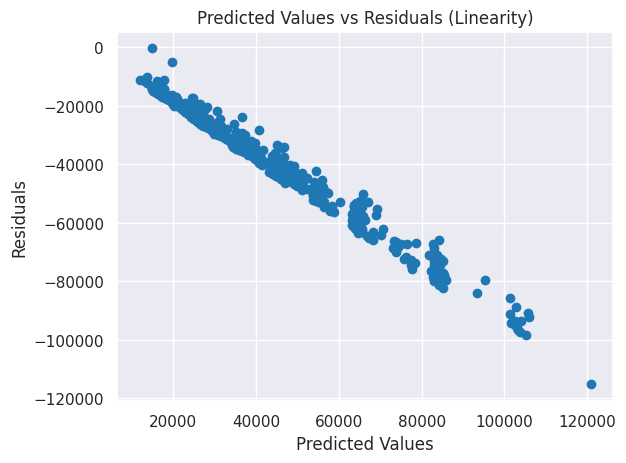

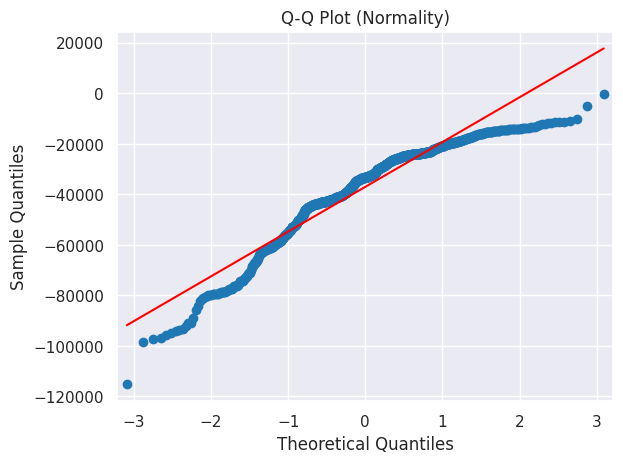

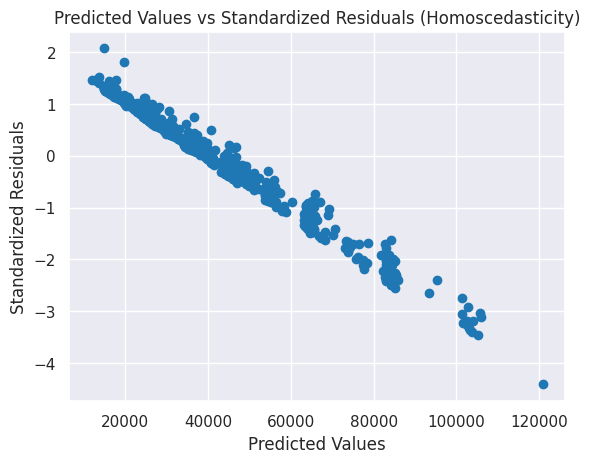

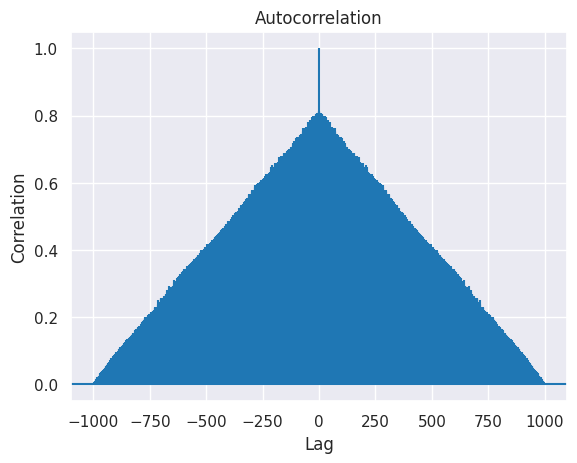

,VIF Factor,Predictor
0,8.695692,x1
1,8.832780,x2
2,1.220410,x3
3,1.410143,x4
4,3.981627,x5
5,3.409662,x6
6,5.470153,x7
7,2.062730,x8
8,3.676121,x9
9,1.096937,x10


In [ ]:
check_regression_assumptions(LinearRegression,data=df,dependent_var='Credit amount')

In [ ]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor, OLSInfluence
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler


def check_regression_assumptions(ModelClass, data, dependent_var, drop_columns=[], vif_threshold=10):
    """
    This function produces various diagnostic plots and checks the assumptions of linear regression:
    Linearity, Normality, Homoscedasticity, absence of multicollinearity, and optionally, autocorrelation.
    """

    # Define the independent and dependent variables
    X = data.drop([dependent_var] + drop_columns, axis=1)
    y = data[dependent_var]

    # Data scaling
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Model fitting
    model = ModelClass()
    model.fit(X_scaled, y)
    y_pred = model.predict(X)
    residuals = y - y_pred

    # Set up a grid for plotting multiple plots
    num_plots = 4
    fig, ax = plt.subplots(num_plots, 1, figsize=(6, 4 * num_plots))

    # Plot 1: Predicted Values vs. Residuals (Linearity)
    ax[0].scatter(y_pred, residuals)
    ax[0].set_xlabel('Predicted Values')
    ax[0].set_ylabel('Residuals')
    ax[0].set_title('Predicted Values vs. Residuals')

    # Plot 2: Q-Q Plot (Normality)
    sm.qqplot(residuals, line='s', ax=ax[1])
    ax[1].set_title("Q-Q Plot of Residuals")

    # Plot 3: Predicted Values vs. Standardized Residuals (Homoscedasticity)
    standardized_residuals = residuals / np.std(residuals)
    ax[2].scatter(y_pred, standardized_residuals)
    ax[2].set_xlabel('Predicted Values')
    ax[2].set_ylabel('Standardized Residuals')
    ax[2].set_title('Predicted Values vs. Standardized Residuals')

    # Plot 4: Autocorrelation
    plot_acf(residuals, ax=ax[3])
    ax[3].set_title("Autocorrelation of Residuals")

    # Display the plots
    plt.tight_layout()
    plt.show()

    # 5. Variance Inflation Factors (VIF)

    VIF_df = pd.DataFrame()
    VIF_df["VIF Factor"] = [vif(X, i) for i in range(X.shape[1])]
    VIF_df["Predictor"] = X.columns
    return VIF_df



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but LinearRegression was fitted without feature names



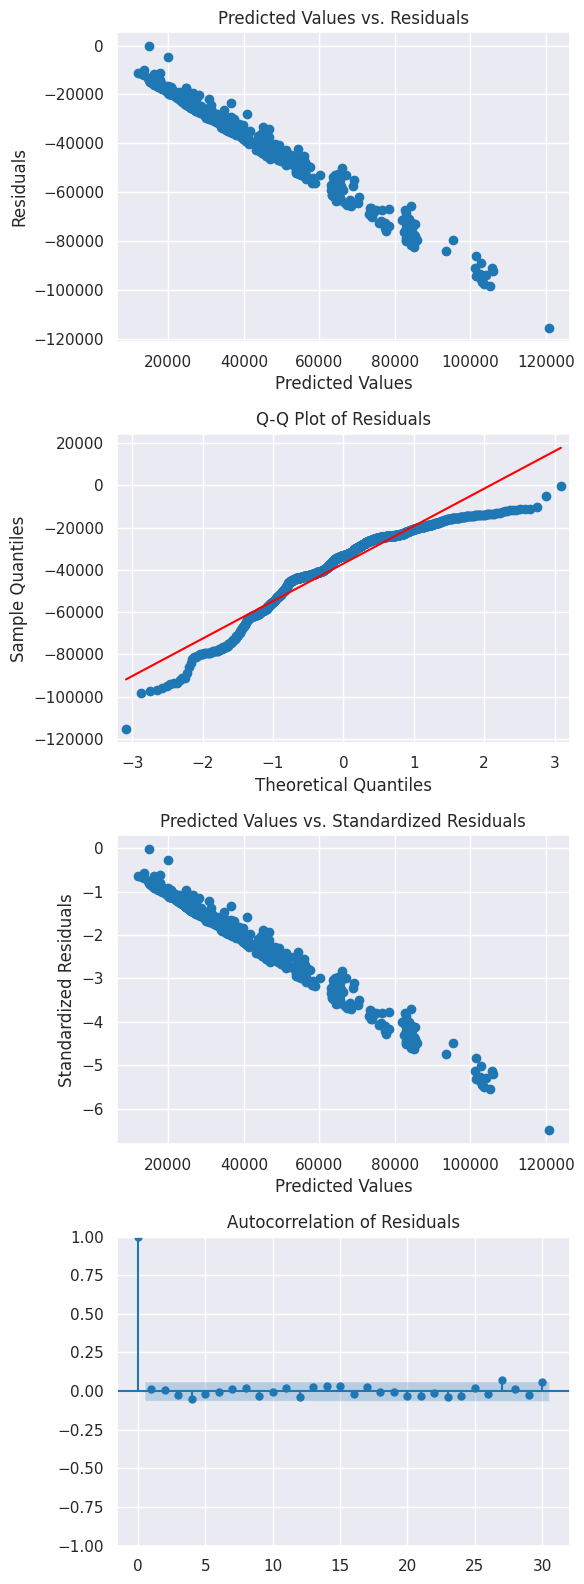

,VIF Factor,Predictor
0,8.695692,Age
1,8.832780,Job
2,1.220410,Saving accounts
3,1.410143,Checking account
4,3.981627,Duration
5,3.409662,Sex_male
6,5.470153,Housing_own
7,2.062730,Housing_rent
8,3.676121,Purpose_car
9,1.096937,Purpose_domestic appliances


In [ ]:
check_regression_assumptions(LinearRegression,data=df,dependent_var='Credit amount')

In [ ]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

def check_regression_assumptions(df, dependent_var, drop_columns=[], vif_threshold=5):
    # Define the independent and dependent variables
    X = df.drop([dependent_var] + drop_columns, axis=1)
    y = df[dependent_var]

    # Fit a linear regression model
    model = sm.OLS(y, sm.add_constant(X)).fit()

    # Get the predicted values
    y_pred = model.predict(sm.add_constant(X))

    # Get the residuals
    residuals = model.resid

    # Plots
    plt.figure(figsize=(15, 10))

    # Predicted Values vs. Residuals (Linearity)
    plt.subplot(2, 3, 1)
    plt.scatter(y_pred, residuals)
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title('Predicted Values vs. Residuals')

    # Q-Q Plot (Normality)
    plt.subplot(2, 3, 2)
    qqplot_residual = sm.qqplot(residuals, line='s')
    plt.title("Q-Q Plot of Residuals")

    # Predicted Values vs. Standardized Residuals (Homoscedasticity)
    standardized_residuals = residuals / np.std(residuals)
    plt.subplot(2, 3, 3)
    plt.scatter(y_pred, standardized_residuals)
    plt.xlabel('Predicted Values')
    plt.ylabel('Standardized Residuals')
    plt.title('Predicted Values vs. Standardized Residuals')

    # Histogram of Residuals (Normality)
    plt.subplot(2, 3, 4)
    sns.distplot(residuals, kde=False)
    plt.xlabel('Residuals')
    plt.title('Histogram of Residuals')

    # Shapiro-Wilk Test of Normality
    p_value_shapiro = stats.shapiro(residuals)[1]
    plt.subplot(2, 3, 5)
    sns.barplot(["P-value"], [p_value_shapiro])
    plt.xlabel("Test")
    plt.ylabel("P-value")
    plt.title("Shapiro-Wilk Test of Normality")

    # Breusch-Pagan Test of Homoscedasticity
    p_value_breusch_pagan = stats.breusch_pagan(model.resid**2, model.model.exog)[1]
    plt.subplot(2, 3, 6)
    sns.barplot(["P-value"], [p_value_breusch_pagan])
    plt.xlabel("Test")
    plt.ylabel("P-value")
    plt.title("Breusch-Pagan Test of Homoscedasticity")

    # VIF (Multicollinearity)
    X_vif = X.copy()
    X_vif = sm.add_constant(X_vif)
    vif_data = pd.Series([variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])], index=X_vif.columns)
    vif_data = vif_data.drop('const')
    print("Variance Inflation Factors (VIF):\n", vif_data)

    multicollinear_columns = vif_data[vif_data > vif_threshold].index.tolist()
    if multicollinear_columns:
        print("The following variables have high multicollinearity:\n", multicollinear_columns)
    else:
        print("No variables have high multicollinearity.")



<ipython-input-45-d3b256d14078>:39: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 3, 3)
<ipython-input-45-d3b256d14078>:47: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals, kde=False)


TypeError: ignored

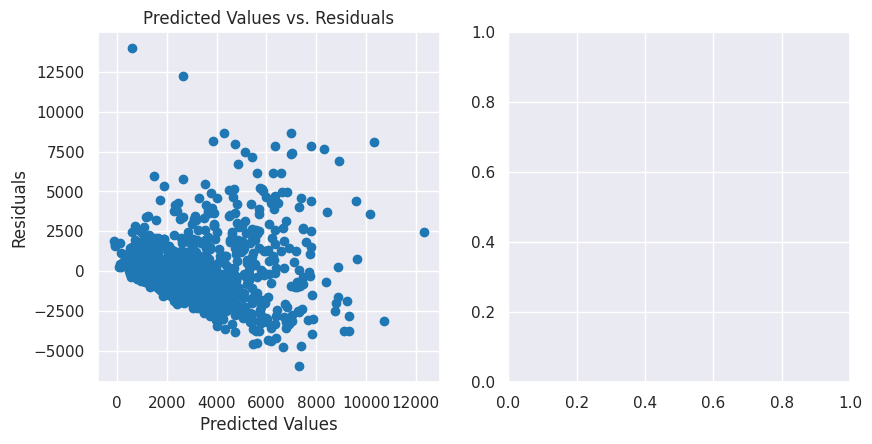

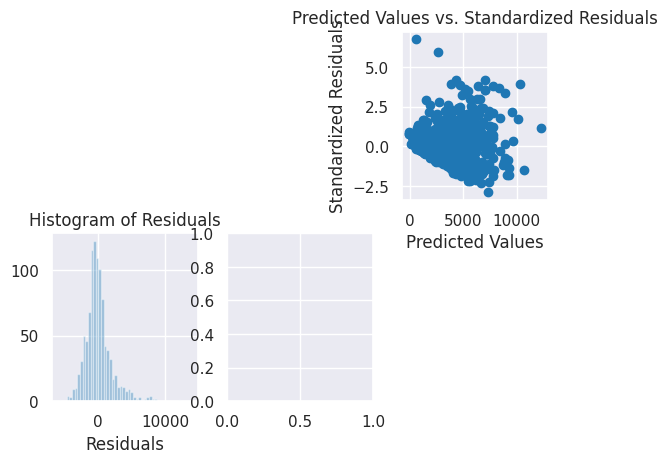

In [ ]:
check_regression_assumptions(df,dependent_var='Credit amount')

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
import pandas as pd
import statsmodels.graphics.gofplots as gofplots
import statsmodels.stats.stattools as sstats

def check_logistic_assumptions(model, X, y):
    predicted_values_proba = model.predict_proba(X)
    predicted_values = predicted_values_proba[:, 1]

    # 1. Linearity of log odds using Box-Tidwell transformation
    X_transformed = X.copy()
    for col in X.columns:
        X_transformed[col + '_log'] = np.log(X[col])
        X_transformed[col + '_log_times_y'] = X_transformed[col + '_log'] * y
    box_tidwell_df = X_transformed.mean()
    print("Box-Tidwell Transformation:")
    print(pd.DataFrame(box_tidwell_df).transpose())

    # 2. Independence between independent variables (multicollinearity)
    corr_matrix = X.corr()
    sns.heatmap(corr_matrix, annot=True)
    plt.title("Correlation Matrix")
    plt.show()

    # 3. Independence of errors using the Durbin-Watson test
    residuals = y - predicted_values
    durbin_watson = np.sum(np.diff(residuals) ** 2) / np.sum(residuals ** 2)
    print("Durbin-Watson:", durbin_watson)

    # 4. Absence of influential values using Cook's distance
    n = len(X)
    k = X.shape[1]
    cook_cutoff = 4 / (n - k - 1)
    _, ax = plt.subplots(figsize=(8, 6))
    ax.stem(model.get_influence().cooks_distance[0], markerfmt=",", baseline=None)
    ax.hlines(cook_cutoff, xmin=0, xmax=len(X), colors="r", linestyles="--")
    ax.set_title("Cook's Distance")
    ax.set_xlabel("Observation Index")
    ax.set_ylabel("Cook's Distance")
    plt.show()

    # 5. Homoscedasticity of residuals
    plt.scatter(predicted_values, residuals)
    plt.xlabel("Predicted Values")
    plt.ylabel("Residuals")
    plt.title("Predicted Values vs Residuals (Homoscedasticity)")
    plt.show()

    # 6. Absence of multicollinearity using VIF
    VIF_df = pd.DataFrame()
    VIF_df["VIF Factor"] = [vif(X.values, i) for i in range(X.shape[1])]
    VIF_df["Predictor"] = X.columns
    print("Variance Inflation Factors:")
    print(VIF_df)
